In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:

from IPython.display import Image
from IPython.core.display import HTML 


In [2]:

# Package Pivottablejs is a JavaScript library integrated into Python via IPython widgets, allowing users to 
# create interactive and flexible aggregate reports directly from DataFrame data. With straightforward syntax, 
# it is a useful tool for efficient and clean data analysis and presentation, assisting in data transformation 
# from Pandas DataFrame into easy-to-observe interactive pivot tables.

from pivottablejs import pivot_ui 
import pandas as pd 
pivot_ui(df) 


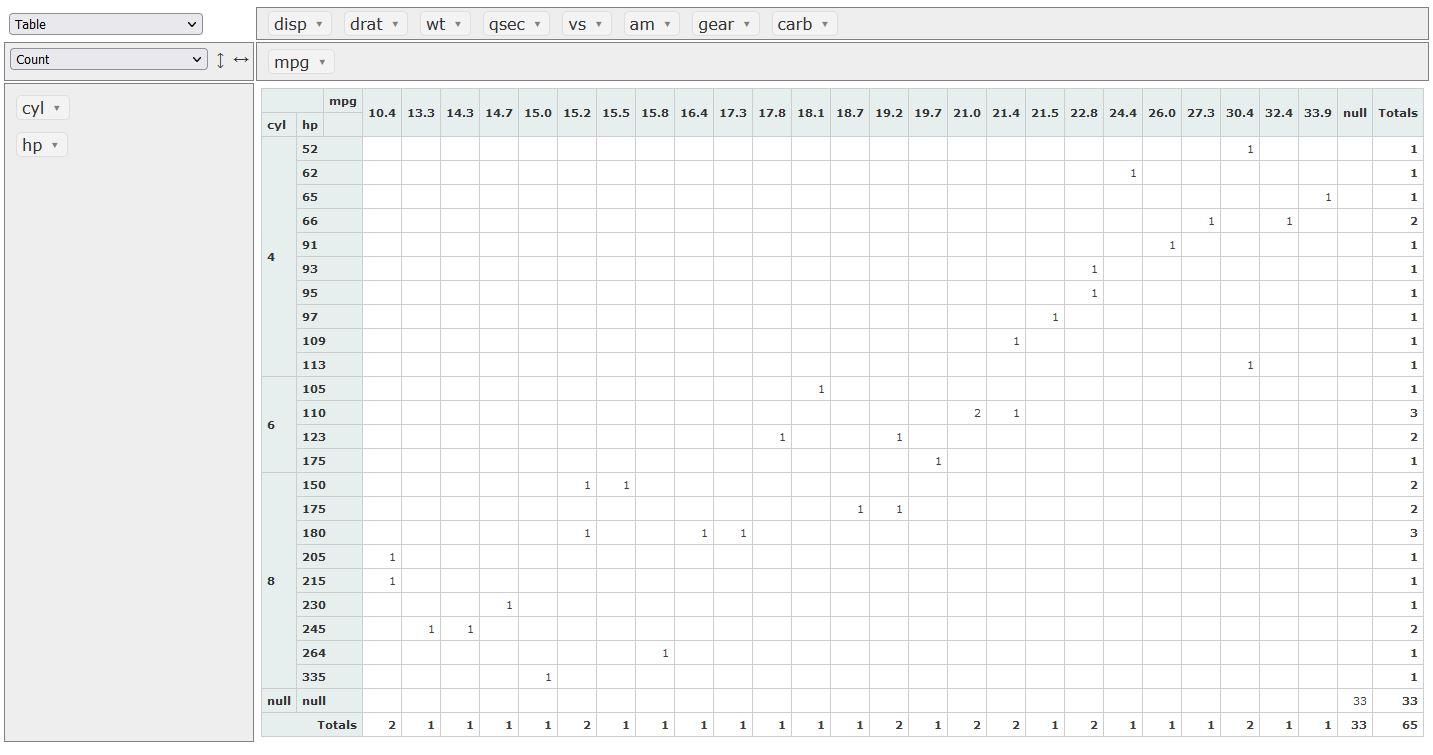

In [15]:

PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")


In [9]:

# Here is a dynamic scatter plot of the data from the dataframe.
from pivottablejs import pivot_ui 
import pandas as pd 
pivot_ui(df) 


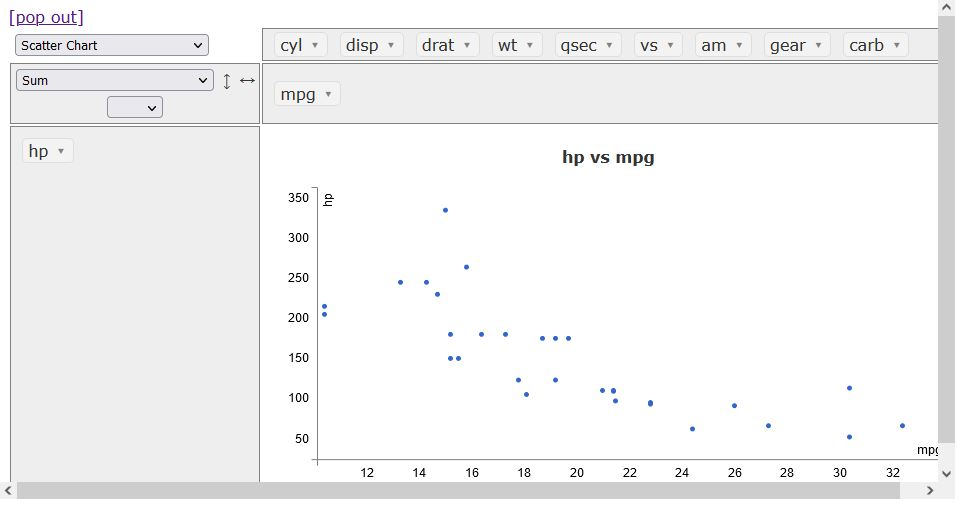

In [18]:

PATH = "C:\\Users\\"
Image(filename = PATH + "3.JPG")


In [12]:

# PyGWalker, is an essential tool that makes it simple to convert pandas data frames into visually intuitive 
# interactive data tables.

import qgrid 
qgridframe = qgrid.show_grid(df, show_toolbar=True)
qgridframe


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

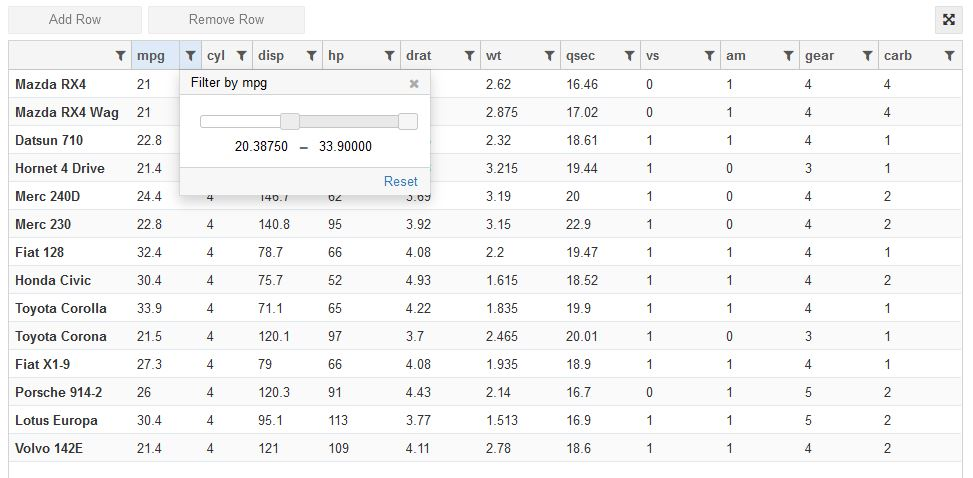

In [17]:

PATH = "C:\\Users\\"
Image(filename = PATH + "4.JPG")


In [5]:

# Itables, like the qgrid package mentioned above, provides a simple interface for data presentation in a table. 
# To explore the data, you can use simple activities such as filtering, searching, sorting, and so on.

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)
show(df)


<IPython.core.display.Javascript object>

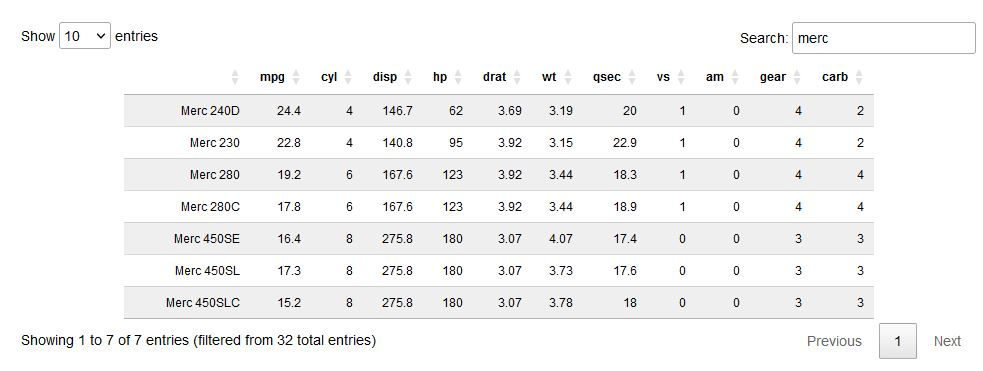

In [16]:

PATH = "C:\\Users\\"
Image(filename = PATH + "5.JPG")


In [17]:

# Display plots in DataFrame columns...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from base64 import b64encode
from io import BytesIO
from IPython.display import HTML

n = 100

data = [
    ('Bitcoin',   40000*np.random.rand(n).round(2)), 
    ('Ethereum',   2000*np.random.rand(n).round(2)), 
    ('BNB',     500*np.random.rand(n).round(2)),
    ('Litecoin',   150*np.random.rand(n).round(2)),
    
]
df = pd.DataFrame(data, columns=['Name', 'Price History'])
df.head()

# then...

def create_line(data, **kwags):
    
    # Convert data to a list
    data = list(data)
    
    # Create a figure and axis object with given size and keyword arguments
    fig, ax = plt.subplots(1, 1, figsize=(3, 0.25), **kwags)
    
    # Plot the data
    ax.plot(data)
    
    # Remove the spines from the plot
    for k,v in ax.spines.items():
        v.set_visible(False)
        
    # Remove the tick marks from the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Plot a red dot at the last point of the data
    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')
    
    # Fill the area under the plot with alpha=0.1
    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    
    # Close the plot to prevent displaying it
    plt.close(fig)
    
    # Save the plot image as png and get its binary data
    img = BytesIO()    
    fig.savefig(img, format='png')
    encoded = b64encode(img.getvalue()).decode('utf-8')  
    
    # Return the encoded image data as an HTML image tag
    return '<img src="data:image/png;base64,{}"/>'.format(encoded)

# finally...


df['Price History Line']  = df['Price History'].apply(create_line)
HTML(df.drop(columns = ["Price History"]).to_html(escape=False))


,Name,Price History Line
0,Bitcoin,
1,Ethereum,
2,BNB,
3,Litecoin,


In [16]:

# Show progress bar...

from tqdm.notebook import tqdm
tqdm.pandas()

# Example function to apply to each row (replace this with your actual function)
def process_row(row):
    # Perform some processing on the row
    return row

# Apply the function to each row with a progress bar
tqdm.pandas(desc="Processing rows")
processed_df = df.progress_apply(process_row, axis=1)


Processing rows:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:

# Add formatting...

df = pd.DataFrame([['Roy', 25, 50000],
                   ['Bob', 30, 60000],
                   ['Joe', 35, 70000]], 
                   columns = ["Names", "Age", "Salary"])
df

df.style.format({"Height": "", 
                 "Weight": "yrs",
                 "Salary":"${:20,.0f}"})


,Names,Age,Salary
0,Roy,25,"$ 50,000"
1,Bob,30,"$ 60,000"
2,Joe,35,"$ 70,000"
